<a href="https://colab.research.google.com/github/andresdatalyst/Proyecto-2-Andres-Perez/blob/main/Inicio_tratamiento_kiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Instalamos el paquete "missingo" que nos ayuda a crear un gráfico donde ver de forma visual los datos faltantes en nuestro dataset

In [3]:
# Instalación silenciosa de missingno
# (No muestra output)
%%capture
!pip install missingno #el signo de ! en !pip para decirle que es un comando

### Importamos las librerías necesarias para realiar nuestro procesamiento y limpieza de datos

In [4]:
# Importamos las librerías ensenciales
import pandas as pd # Para manejo de datos
import numpy as np # Para operaciones numéricas
import plotly as pl # Para visualizaciones interactivas
import seaborn as sns # Para gráficos estadísticos
import missingno as msno # Para visualizar datos faltantes


## Cargamos el dataset de kiva_loans.csv para trabajar

In [5]:
from google.colab import drive

drive.mount('/content/drive') # Para leer un archivo en drive directamente

Mounted at /content/drive


In [6]:
# Cargamos nuestro dataset principal
#df = pd.read_csv('kiva_loans.csv') forma de leer un archivo subido a collab
df = pd.read_csv('/content/drive/My Drive/Bootcamp DataAnalytics Andrés Pérez/P2 kiva/kiva_loans.csv') #lectura del archivo drive

In [7]:
#Aseguramos que sea un Dataframe
df = pd.DataFrame(df)

In [8]:
# Mostramos las 20 primeras
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [9]:
#Vemos la forma del dataset(filas, columnas)
df.shape

(671205, 20)

In [10]:
#Información general del dataset
#Tipos de datos, nulos, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [11]:
#Contamos valores no nulos por columna
df.count()

,0
id,671205
funded_amount,671205
loan_amount,671205
activity,671205
sector,671205
use,666973
country_code,671197
country,671205
region,614405
currency,671205


In [12]:
#Estadística descriptiva de las columnas numéricas
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [13]:
# Buscamos duplicados
df.duplicated().sum()

np.int64(0)

##Hay valores nulos?

In [14]:
# Contamos nulos por columna, ordenados de mayor a menor
df.isna().sum().sort_values(ascending=False)

,0
tags,171416
region,56800
funded_time,48331
partner_id,13507
use,4232
borrower_genders,4221
disbursed_time,2396
country_code,8
activity,0
loan_amount,0


#Son más del 25%?

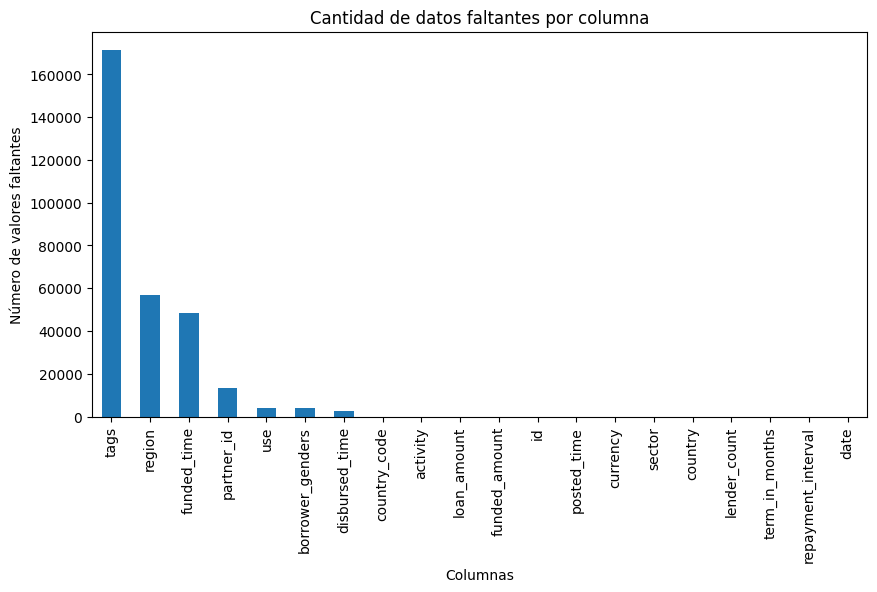

In [15]:
# Verificamos si los nulos superan el 25%
import matplotlib.pyplot as plt

#Calcular % de nulos
missing = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(10,5)) #Tamaño del espacio y espacio donde estará la gráfica
missing.plot(kind = "bar") #tipo de gráfico
plt.title("Cantidad de datos faltantes por columna") # Título de la gráfica
plt.ylabel("Número de valores faltantes") # nombre eje y
plt.xlabel("Columnas") # nombre eje X
plt.show()


In [16]:
#Mostramops el % de datos null en nuestro dataset
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct)

tags                  25.538546
region                 8.462392
funded_time            7.200632
partner_id             2.012351
use                    0.630508
borrower_genders       0.628869
disbursed_time         0.356970
country_code           0.001192
activity               0.000000
loan_amount            0.000000
funded_amount          0.000000
id                     0.000000
posted_time            0.000000
currency               0.000000
sector                 0.000000
country                0.000000
lender_count           0.000000
term_in_months         0.000000
repayment_interval     0.000000
date                   0.000000
dtype: float64


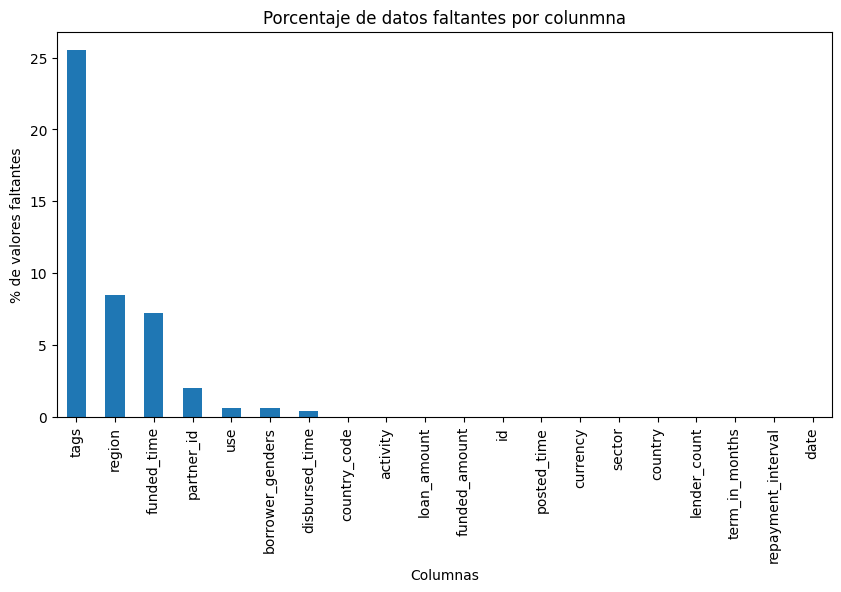

In [17]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(10,5)) #Tamaño del espacio y espacio donde estará la gráfica
missing_pct.plot(kind = "bar") #tipo de gráfico
plt.title("Porcentaje de datos faltantes por colunmna") # Título de la gráfica
plt.ylabel("% de valores faltantes") # nombre eje y
plt.xlabel("Columnas") # nombre eje X
plt.show()

## La colunma tags tiene muchois valores faltantes, debería borrarla por que no aporta tanta información

<Axes: >

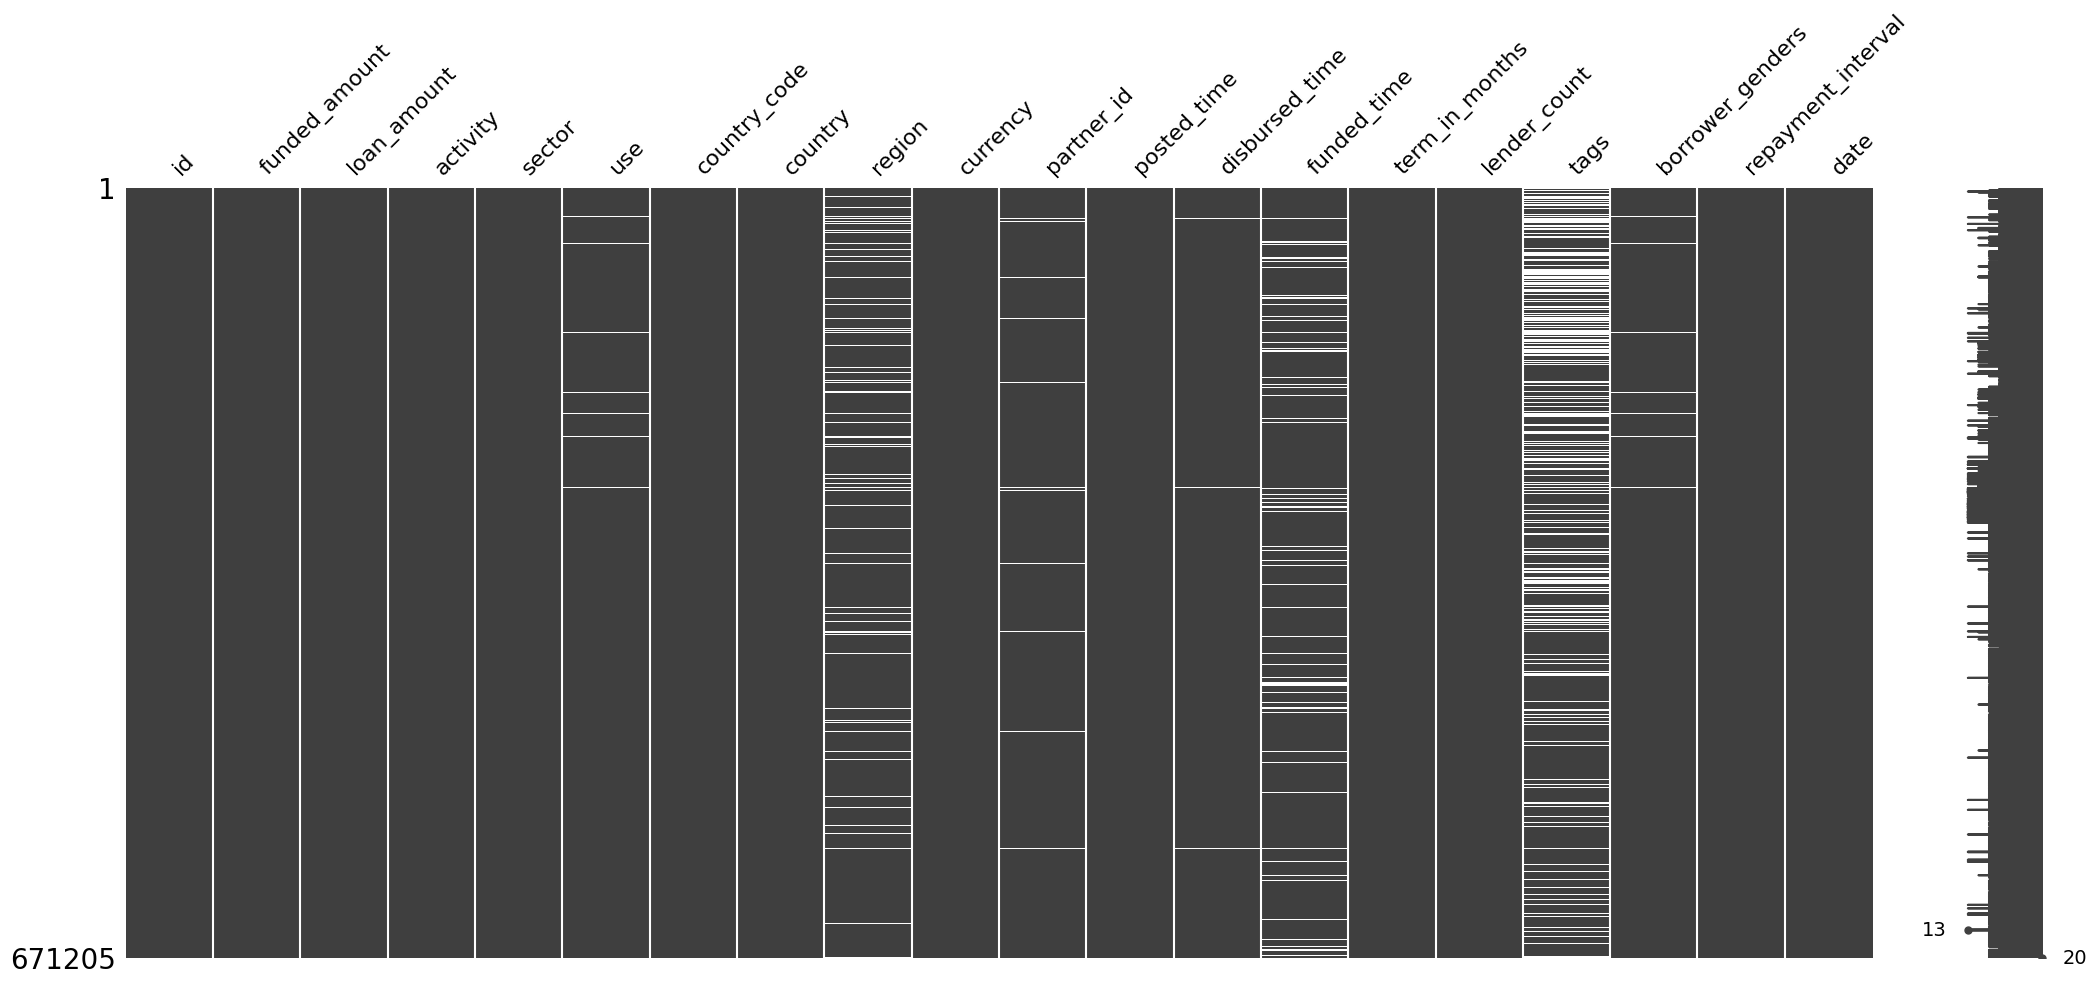

In [18]:
#Podemos usar la funcion matrix para tener una visualización amplia de datos null y no null
#Si está en negro significa que tiene un valor, si está en blanco es que no hay valor
msno.matrix(df)

<Axes: >

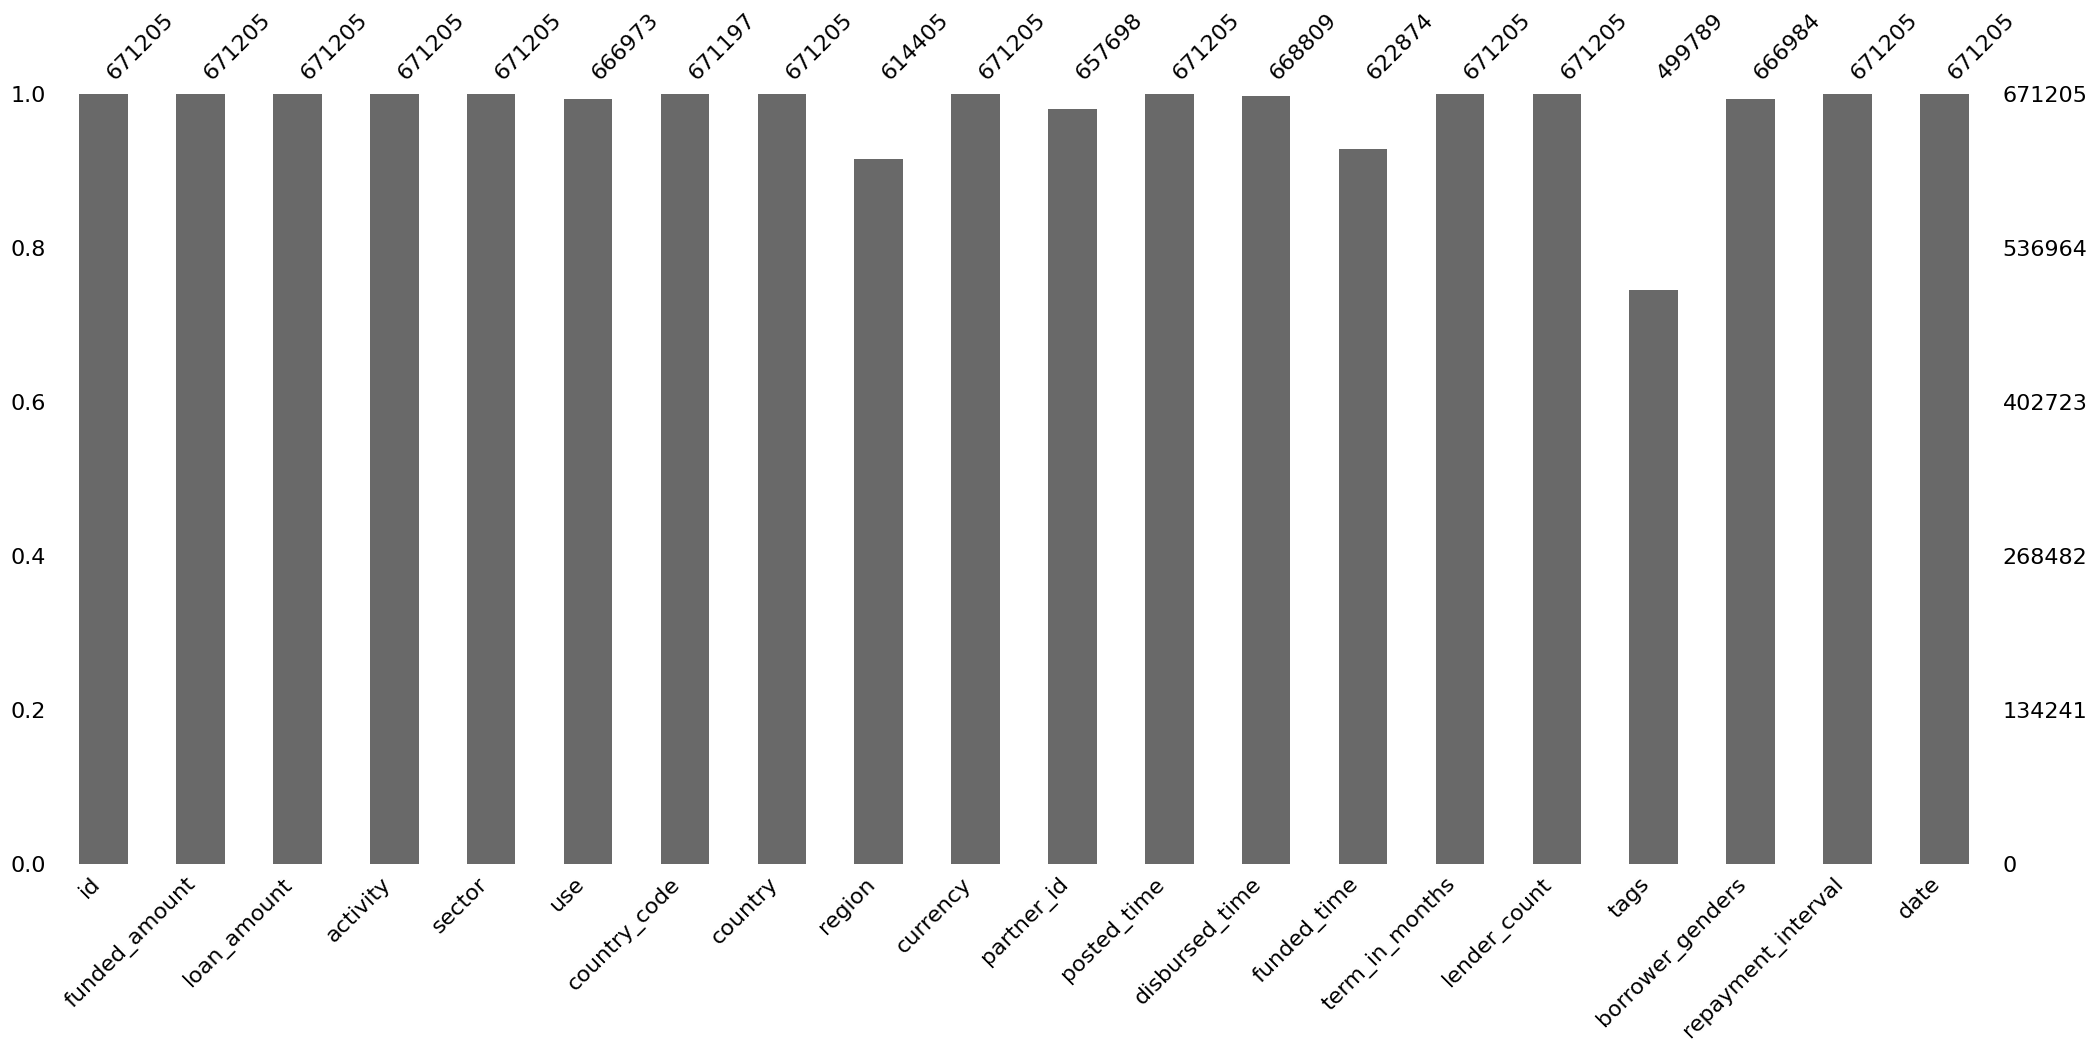

In [19]:
#Otra forma de visualizar la falta de valores en nuestro dataset
msno.bar(df)

### Creamos una copia del dataset original para aplicarle cambios importantes como borrar columnas, cambiar tipos de datos, etc


In [20]:
#Creamos una copia del df para poder limpiar, borrar y modificarlo
kiva_loans_df = df.copy()
kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

## Borraremos las columnas que no nos aportan mucha información o información de valor, en este caso borraremos las columnas parthner_id, country_code, tags, borrower_genders y date

In [21]:
#Creamos una lista con el nombre de las columnas que queremos eliminar
#Estas columnas las borraremos si para el análisis no la necesitamos
cols_to_drop = ['country_code','tags','partner_id','borrower_genders','date','funded_time','region','use']

for col in cols_to_drop: #Recorremos la lista
  if col in kiva_loans_df.columns: #Si col se encuentra en las columnas del dataset
    kiva_loans_df = kiva_loans_df.drop(columns=col) # Eliminamos las columnas

kiva_loans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   country             671205 non-null  object 
 6   currency            671205 non-null  object 
 7   posted_time         671205 non-null  object 
 8   disbursed_time      668809 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 61.5+ MB


## Comprobación de columnas

In [22]:
kiva_loans_df.shape

(671205, 12)

In [23]:
#muestreo del dataset

kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,PKR,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,PKR,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,INR,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,43.0,6,bullet
3,653063,200.0,200.0,Embroidery,Arts,Pakistan,PKR,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,11.0,8,irregular
4,653084,400.0,400.0,Milk Sales,Food,Pakistan,PKR,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,14.0,16,monthly


## Vamos a cambiar el tipo de dato de fecha ya que se encuentra en object en datetime

In [24]:
# Convertir a datetime las fechas
kiva_loans_df["posted_time"] = pd.to_datetime(kiva_loans_df["posted_time"], errors="coerce")
kiva_loans_df["disbursed_time"] = pd.to_datetime(kiva_loans_df["disbursed_time"], errors="coerce")

# Normalizar a la fecha(eliminar la hora, estableciendo en medianoche) manteniendo el tipo de dato
kiva_loans_df["posted_time"] = kiva_loans_df['posted_time'].dt.normalize()
kiva_loans_df["disbursed_time"] = kiva_loans_df['disbursed_time'].dt.normalize()

kiva_loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  object             
 5   country             671205 non-null  object             
 6   currency            671205 non-null  object             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  datetime64[ns, UTC]
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  object             
dtypes: datetime64[ns

In [25]:
kiva_loans_df.head(3)

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,Fruits & Vegetables,Food,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular
1,653053,575.0,575.0,Rickshaw,Transportation,Pakistan,PKR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular
2,653068,150.0,150.0,Transportation,Transportation,India,INR,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet


## Tomamos las columnas de tipo de dato "object" y les definimos el tipo de dato string

### Es importante asegurarnos que todo los datos object sean string
### Puede pasar que alguno sea otro tipo de dato

In [26]:
# Recorremos la las columnas del dataset para cambiar el tipo de dato de cada columna
for col in kiva_loans_df.columns:
  if kiva_loans_df[col].dtype == "object": # encontramos el tipo object
    kiva_loans_df[col] = kiva_loans_df[col].astype("string") # lo cambiamos a tipo string

kiva_loans_df.info() # comprobamos que el Dtype es string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  string             
 4   sector              671205 non-null  string             
 5   country             671205 non-null  string             
 6   currency            671205 non-null  string             
 7   posted_time         671205 non-null  datetime64[ns, UTC]
 8   disbursed_time      668809 non-null  datetime64[ns, UTC]
 9   term_in_months      671205 non-null  float64            
 10  lender_count        671205 non-null  int64              
 11  repayment_interval  671205 non-null  string             
dtypes: datetime64[ns

Nos aseguramos que los datos de tipo string no tengan espacios innecesarios y que estén escritas en minúscula

In [27]:
#Creamos una función para quitar los espacios y lo ponemos en minúscula todos los datos
#Hay que tener cuidado si el string está dividido por ; o hay varios string en el valor de una columna
def clean_text(s):
  return s.astype(str).str.strip().str.lower()

for col in kiva_loans_df.columns: # Recorremos las columnas del dataset de prueba
  if kiva_loans_df[col].dtype == 'string': # condición si el tipo de col es string
    kiva_loans_df[col]= clean_text(kiva_loans_df[col]) # le realizamos la funcion a todos los valores

kiva_loans_df.head(3)

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet


## Clasificación de préstamos según la fecha de desembolso

#### Creamos la columna loan_type para saber si un préstamos fue desembolsado antes o después de la fecha de publicación:

#### - "pre_disbursed": el préstamo se desembolsó antes de publicarse (disbursed_time < posted_time)

#### - "post_disbursed": el préstamos se desembolsó después de publicarse(disbursed_time >= posted_time)

In [28]:
# Creo una columna con la condicion, si se da le dará el valor pre-disbursed y sino post_disbursed
kiva_loans_df["loan_type"] = np.where(
    kiva_loans_df["disbursed_time"] < kiva_loans_df['posted_time'],
    "pre_disbursed",
    "post_disbursed"
)

In [29]:
kiva_loans_df.head(20)

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed
3,653063,200.0,200.0,embroidery,arts,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed
4,653084,400.0,400.0,milk sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed
5,1080148,250.0,250.0,services,services,kenya,kes,2014-01-01 00:00:00+00:00,2014-01-30 00:00:00+00:00,4.0,6,irregular,post_disbursed
6,653067,200.0,200.0,dairy,agriculture,india,inr,2014-01-01 00:00:00+00:00,2013-12-16 00:00:00+00:00,43.0,8,bullet,pre_disbursed
7,653078,400.0,400.0,beauty salon,services,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-20 00:00:00+00:00,14.0,8,monthly,pre_disbursed
8,653082,475.0,475.0,manufacturing,manufacturing,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-20 00:00:00+00:00,14.0,19,monthly,pre_disbursed
9,653048,625.0,625.0,food production/sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,24,irregular,pre_disbursed


In [30]:
# Recojo todos los registros del dataset donde el valor de la columna loan_type == post_disbrsed
post_disbursed_loans = kiva_loans_df[kiva_loans_df["loan_type"] == "post_disbursed"]
# muestra de datos
post_disbursed_loans.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type
5,1080148,250.0,250.0,services,services,kenya,kes,2014-01-01 00:00:00+00:00,2014-01-30 00:00:00+00:00,4.0,6,irregular,post_disbursed
62,653290,4275.0,4275.0,personal housing expenses,housing,vietnam,vnd,2014-01-02 00:00:00+00:00,2014-01-27 00:00:00+00:00,14.0,144,bullet,post_disbursed
67,1080150,125.0,125.0,energy,services,kenya,kes,2014-01-02 00:00:00+00:00,2014-01-30 00:00:00+00:00,3.0,6,irregular,post_disbursed
99,1080153,5000.0,5000.0,food production/sales,food,united states,usd,2014-01-02 00:00:00+00:00,2014-03-10 00:00:00+00:00,30.0,261,monthly,post_disbursed
114,1080151,125.0,125.0,energy,services,kenya,kes,2014-01-02 00:00:00+00:00,2014-01-30 00:00:00+00:00,3.0,7,irregular,post_disbursed


## Creamos una nueva columna 'loan_amount' para clasificar si el prestamos es muy pequeño, pequeño, medio, o grande


In [31]:
# obtener min y max reales
min_val = kiva_loans_df['loan_amount'].min()
max_val = kiva_loans_df['loan_amount'].max()

# Definir límites según los rangos
bins = [
    min_val, # minimo real
    500,
    2500,
    10000,
    max_val # maximo real
]

'''This creates four intervals:

[min_val, 500)
[500, 2500)
[2500, 10000)
[10000, max_val]'''

#lista con las nuevas categorías que usaremos como labels para nuestro bin
labels = ["micro", " small", "medium", "large"]
#Creación de la nueva columna
kiva_loans_df["loan_amount_category"] = pd.cut(kiva_loans_df["loan_amount"], bins=bins, labels=labels, right=False) # false es porque (]

#Ver resumen
print(kiva_loans_df["loan_amount_category"].value_counts())
print("Min", min_val, "Max:", max_val)

loan_amount_category
micro     330534
 small    299111
medium     40144
large       1415
Name: count, dtype: int64
Min 25.0 Max: 100000.0


In [32]:
kiva_loans_df.shape

(671205, 14)

In [33]:
kiva_loans_df.head()

,id,funded_amount,loan_amount,activity,sector,country,currency,posted_time,disbursed_time,term_in_months,lender_count,repayment_interval,loan_type,loan_amount_category
0,653051,300.0,300.0,fruits & vegetables,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,12.0,12,irregular,pre_disbursed,micro
1,653053,575.0,575.0,rickshaw,transportation,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,11.0,14,irregular,pre_disbursed,small
2,653068,150.0,150.0,transportation,transportation,india,inr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,43.0,6,bullet,pre_disbursed,micro
3,653063,200.0,200.0,embroidery,arts,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-24 00:00:00+00:00,11.0,8,irregular,pre_disbursed,micro
4,653084,400.0,400.0,milk sales,food,pakistan,pkr,2014-01-01 00:00:00+00:00,2013-12-17 00:00:00+00:00,14.0,16,monthly,pre_disbursed,micro


# Visualizamos la información que hemos limpiado

## Histograma

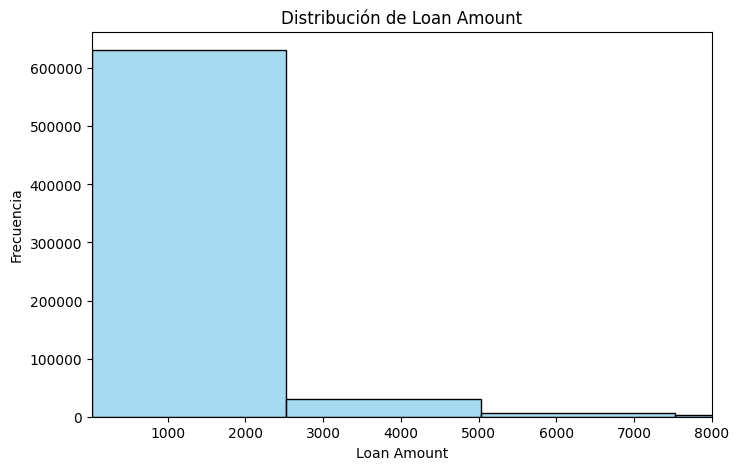

In [34]:
#Primero creamos la figure, que es la plantilla donde irá nuestro gráfico
plt.figure(figsize =(8,5)) # 8 es el ancho y 5 la altura
sns.histplot(kiva_loans_df['loan_amount'], bins=40, kde=False, color='skyblue') # con sns creamos un plot que será nuestro gráfico en nuestro caso un histograma
plt.title("Distribución de Loan Amount") # titulo del gráfico
plt.xlabel("Loan Amount") # nombre del eje x
plt.ylabel("Frecuencia") # nombre del eje y
plt.xlim(25,8000)
plt.show()

##

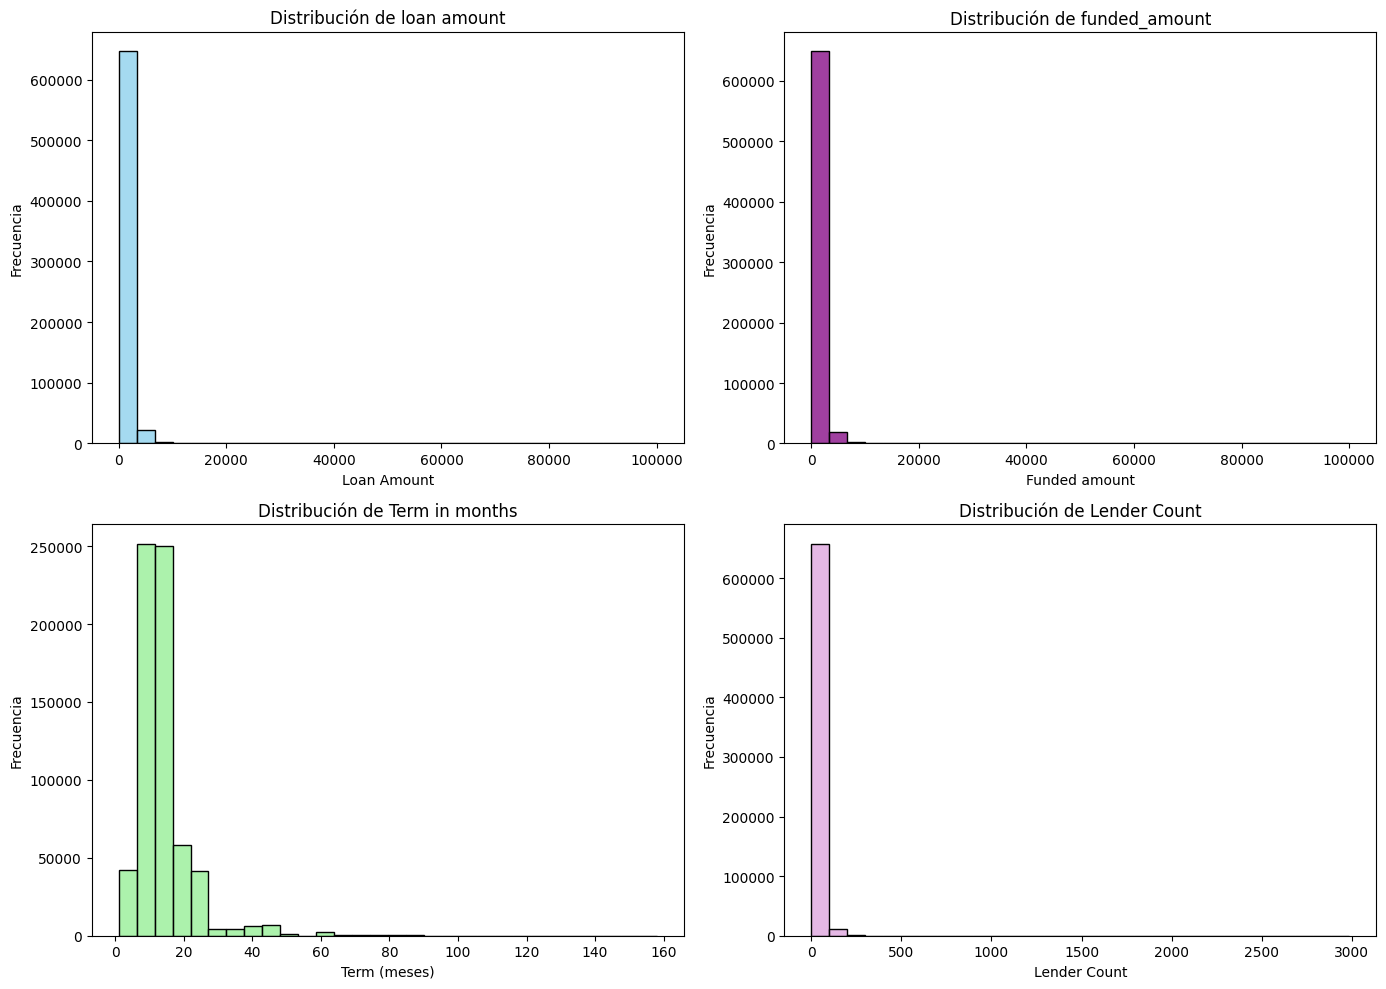

In [35]:
#Creamos una base para poner varios gráficos
fig, axes = plt.subplots(2,2, figsize=(14,10))
axes = axes.flatten()

#Loan Amount
sns.histplot(df['loan_amount'], bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de loan amount')
axes[0].set_xlabel('Loan Amount')
# axes[0].xslim(25,8000)
axes[0].set_ylabel('Frecuencia')


#funded_amount
sns.histplot(df['funded_amount'], bins=30, kde=False, color='purple', ax=axes[1])
axes[1].set_title('Distribución de funded_amount')
axes[1].set_xlabel('Funded amount')
# axes[0].xslim(25,8000)
axes[1].set_ylabel('Frecuencia')

# term_in_months
sns.histplot(df['term_in_months'], bins=30, kde=False, color='lightgreen', ax=axes[2])
axes[2].set_title('Distribución de Term in months')
axes[2].set_xlabel('Term (meses)')
# axes[0].xslim(25,8000)
axes[2].set_ylabel('Frecuencia')

# lender count
sns.histplot(df['lender_count'], bins=30, kde=False, color='plum', ax=axes[3])
axes[3].set_title('Distribución de Lender Count')
axes[3].set_xlabel('Lender Count')
# axes[0].xslim(25,8000)
axes[3].set_ylabel('Frecuencia')

plt.tight_layout()



# Gráfico de barras

## Para datos discretos como países, sectores, tipos de loan, etc...

<class 'pandas.core.series.Series'>
Index: 10 entries, philippines to ecuador
Series name: funded_amount
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0+ bytes


/tmp/ipython-input-2395153267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_totals.index, y= country_totals.values, palette='viridis') # en este caso es un gráfico de barras


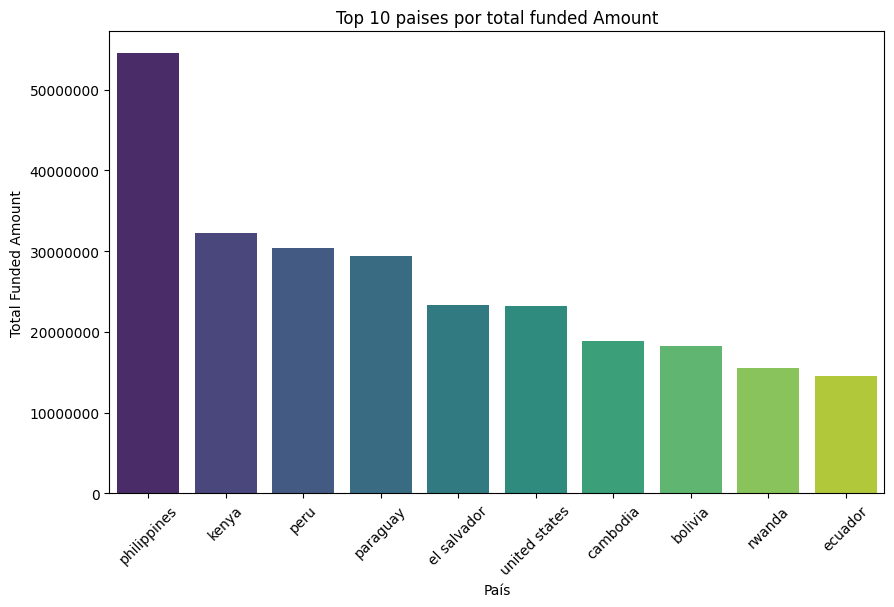

In [36]:
#obtenemos una serie, de la suma de funded_amount agrupadas por paises, cogemos los 10 primeros
country_totals = kiva_loans_df.groupby('country')['funded_amount'].sum().sort_values(ascending=False).head(10)

country_totals.info()

#Creamos el gráfico para mostrarlo
plt.figure(figsize=(10,6))
sns.barplot(x=country_totals.index, y= country_totals.values, palette='viridis') # en este caso es un gráfico de barras
plt.title('Top 10 paises por total funded Amount')
plt.xlabel("País")
plt.ylabel("Total Funded Amount")
plt.ticklabel_format(style='plain', axis='y') # Add this line to show full numbers on y-axis
plt.xticks(rotation=45)
plt.show()

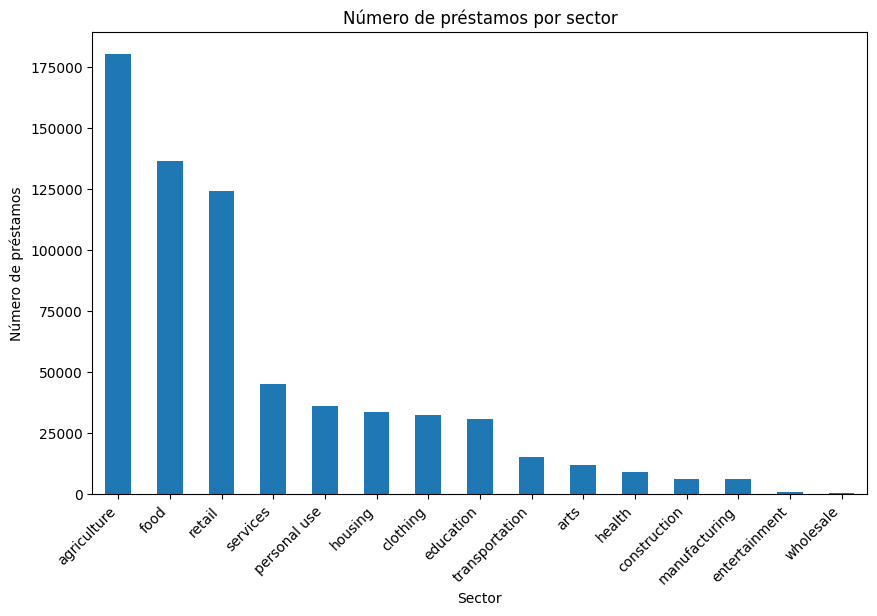

In [37]:
#Realizamos un count de los sectores
count_by_sector = kiva_loans_df['sector'].value_counts().sort_values(ascending=False)

#Realizamos un gráfico para mostrarlo
plt.figure(figsize=(10,6))
count_by_sector.plot(kind='bar')
plt.title('Número de préstamos por sector')
plt.xlabel("Sector")
plt.ylabel("Número de préstamos")
plt.xticks(rotation=45, ha='right')
plt.show()


/tmp/ipython-input-3631320367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan_type', y='lender_count', data=agg, palette='viridis')


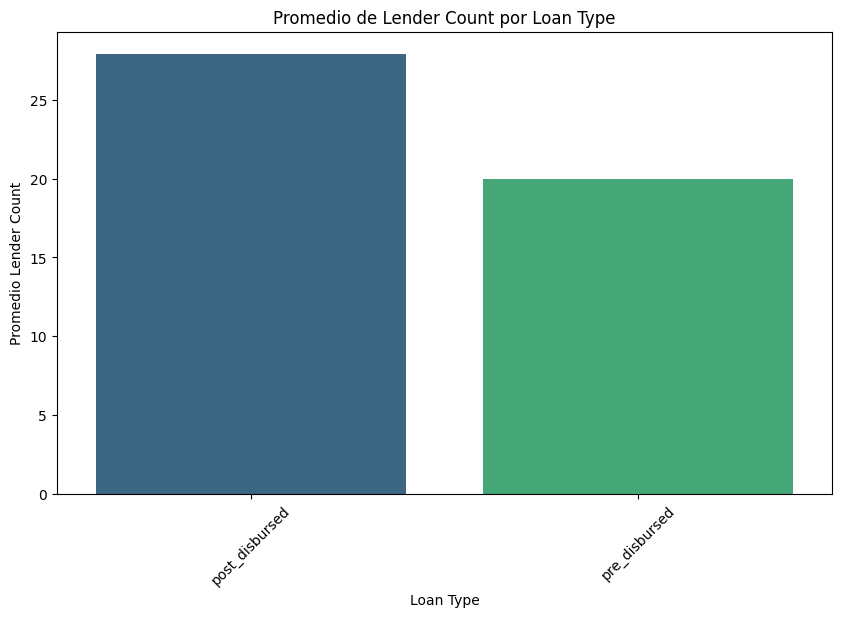

In [38]:
# Calculamos la media de lender_count y lo agregamos por loan_type
agg = kiva_loans_df.groupby('loan_type')['lender_count'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='loan_type', y='lender_count', data=agg, palette='viridis')
plt.title('Promedio de Lender Count por Loan Type')
plt.xlabel("Loan Type")
plt.ylabel("Promedio Lender Count")
plt.xticks(rotation=45)
plt.show()

## Gráficos de lineas:

/tmp/ipython-input-2289938888.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  kiva_loans_df['month'] = kiva_loans_df['posted_time'].dt.to_period('M')


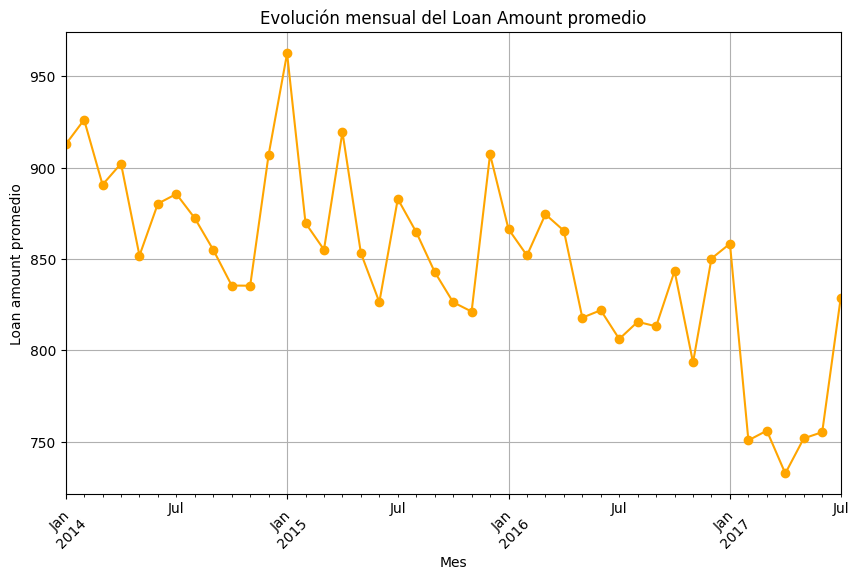

In [39]:
#Creamos una columna month de tipo dt.to_period
kiva_loans_df['month'] = kiva_loans_df['posted_time'].dt.to_period('M')
# Agrupamos la media de loan_amount por mes
monthly_avg = kiva_loans_df.groupby('month')['loan_amount'].mean()

#Creación de la figura
plt.figure(figsize=(10,6))
monthly_avg.plot(marker = 'o', color='orange')
plt.title('Evolución mensual del Loan Amount promedio')
plt.xlabel("Mes")
plt.ylabel("Loan amount promedio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipython-input-3595610969.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  kiva_loans_df_line = kiva_loans_df.groupby(pd.Grouper(key='posted_time',freq='M')).agg({'funded_amount':'sum'}).reset_index()


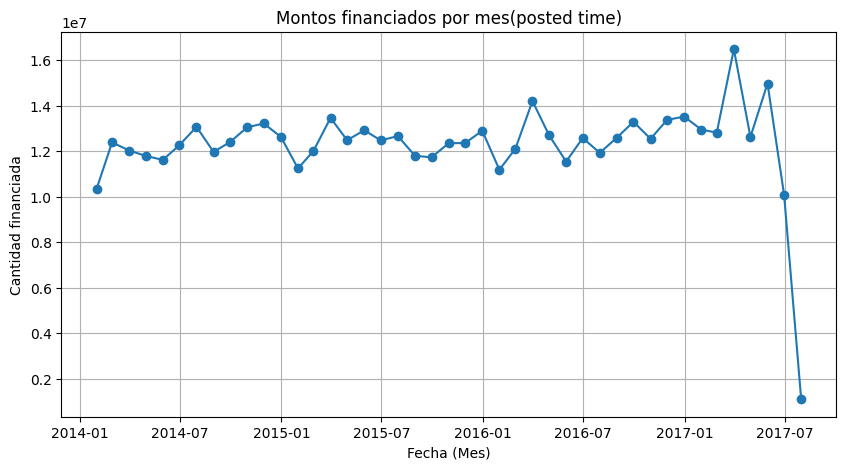

In [40]:
kiva_loans_df['posted_time'] = pd.to_datetime(kiva_loans_df['posted_time'], errors='coerce')

# 1) Gráfico de línea temporal
# por ejemplo, montos financiados por fecha de publicación(podrías agrupar por días/meses)
kiva_loans_df_line = kiva_loans_df.groupby(pd.Grouper(key='posted_time',freq='M')).agg({'funded_amount':'sum'}).reset_index()


#Creación de la figura
plt.figure(figsize=(10,5))
plt.plot(kiva_loans_df_line['posted_time'],kiva_loans_df_line['funded_amount'], marker='o')
plt.title('Montos financiados por mes(posted time)')
plt.xlabel("Fecha (Mes)")
plt.ylabel("Cantidad financiada")
plt.grid(True)
plt.show()

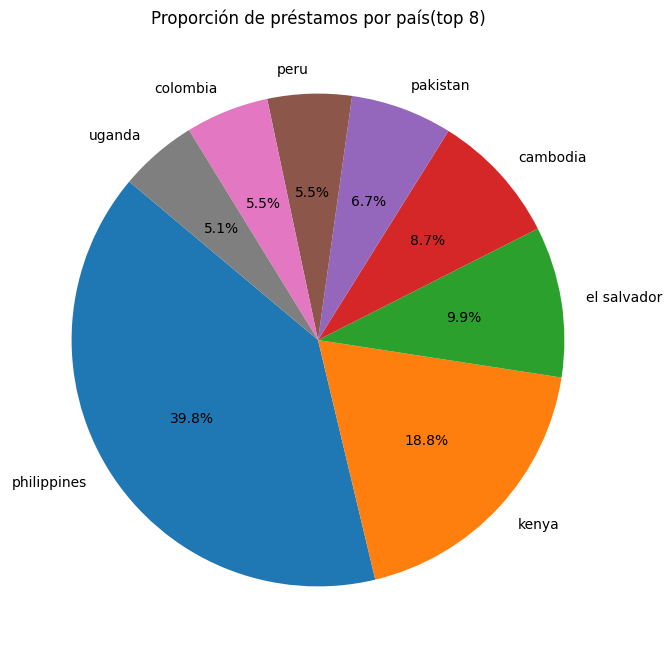

In [41]:
#Pie chart
top_countries = kiva_loans_df['country'].value_counts().nlargest(8)
plt.figure(figsize= (8,8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de préstamos por país(top 8)')
plt.show()

## Choropleth map

In [56]:
%%capture
!pip install geodatasets
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [43]:
import geopandas as gpd
import geodatasets
import os
import requests
import zipfile

In [44]:
pd.set_option('display.max_columns',None)
# pd.reset_option('display.max_columns)

## La extensión .sho es la parte principal de un Shapefile, un formato de datos de Geoinformática(Gis) popular que almacena la geometría de elementos geográficos como puntos, líneas y polígonos

In [60]:
# para descargar este archivo zip, nos dirigimos a
world = gpd.read_file("ne_110m_admin_0_countries.shp")
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [61]:
world['NAME']

,NAME
0,Fiji
1,Tanzania
2,W. Sahara
3,Canada
4,United States of America
...,...
172,Serbia
173,Montenegro
174,Kosovo
175,Trinidad and Tobago


## Verificamos que el formato de world ['NAME'] y kiva_loans_df['country'] sea el mismo

In [62]:
#Convertimos los datos de la columna country en el mismo formato
#que world para poder buscar los paises coincidentes, el title pone la
#primera letra en mayúsculas ej -> Pakistan
kiva_loans_df['country'] = kiva_loans_df["country"].astype(str).str.title().str.strip()
world['NAME']= world['NAME'].astype(str).str.title().str.strip()

In [63]:
kiva_loans_df['country']

,country
0,Pakistan
1,Pakistan
2,India
3,Pakistan
4,Pakistan
...,...
671200,Paraguay
671201,Kenya
671202,Kenya
671203,Kenya


In [64]:
# Hago un sumatorio de loan amount y lo agrupo por ciudades
country_stats = kiva_loans_df.groupby("country", as_index=False)["loan_amount"].sum()
# Renombramos el nombre de la columna
country_stats = country_stats.rename(columns={"loan_amount": "total_loan"})

print(country_stats.index)
print(country_stats.head()
)

RangeIndex(start=0, stop=87, step=1)
       country  total_loan
0  Afghanistan     14000.0
1      Albania   2666500.0
2      Armenia  12915400.0
3   Azerbaijan   2888700.0
4       Belize    114025.0


## Hacemos un left join, al dataframe world se le agrega la info del dataframe country_stats cuando coinciden, si hay país que no existe entonces se manca como NaN

In [65]:
# el merge es una conexión entre dataframes parecido a un join en sql
merged = world.merge(country_stats, left_on="NAME", right_on="country", how="left")


<Axes: >

<Figure size 2000x2000 with 0 Axes>

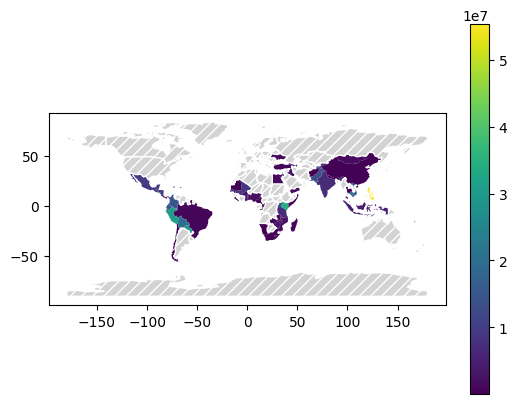

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
merged.plot(
    column = "total_loan",
    cmap = "viridis",
    legend= True,
    missing_kwds = {
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data"
    }

)

plt.tittle("Total loan Amount por País", fontsize= 18)
plt.axis("off")
plt.show()

In [67]:
import folium

In [69]:
m = folium.Map(location = [20,0],zoom_start=2)

#Agregar capa GeoJson con información por país

folium.GeoJson(
    merged,
    style_function=lambda feature : {
        'fillColor': '#gray' if feature['properties']['total_loan'] is None else '#3186cc',
        'color' : 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
        },
    tooltip = folium.GeoJsonTooltip(
        fields = ['NAME','total_loan'],
        aliases = ['País: ', 'Total loan:'],
        localize=True,
        sticky= True
    )
).add_to(m)

In [70]:
#Vemos el mapa
m

## Verificamos la existencia de outliers(valores atípicos), respecto a las columnas funded_amount: y loan_amount

In [73]:
categories = ["micro","small","medium","large"]

for cat in categories:
  df_cat = kiva_loans_df[kiva_loans_df["loan_amount_category"]== cat]

  if df_cat.empty:
    print(f"\n{cat}: (sin datos)")
    continue

  q1 = df_cat["loan_amount"].quantile(0.25)
  q3 = df_cat["loan_amount"].quantile(0.75)
  iqr = q3 - q1

  #Limites para detectar outliers

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 - 1.5 * iqr

  #Filtrar outliers
  outliers = df_cat[(df_cat["loan_amount"]< lower_bound) | (df_cat["loan_amount"]> upper_bound)]
  n_outliers = len(outliers)

  print(f"\nCategoría: {cat}")
  print(f"    Q1: {q1}")
  print(f"    Q2: {q3}")
  print(f"     IQR: {iqr}")
  print(f"     Outliers: {n_outliers}")


Categoría: micro
    Q1: 200.0
    Q2: 350.0
     IQR: 150.0
     Outliers: 285001

small: (sin datos)

Categoría: medium
    Q1: 3000.0
    Q2: 5000.0
     IQR: 2000.0
     Outliers: 40144

Categoría: large
    Q1: 10000.0
    Q2: 10000.0
     IQR: 0.0
     Outliers: 183


In [ ]:
kiva_loans_df.head()

#Gráfico de densidad

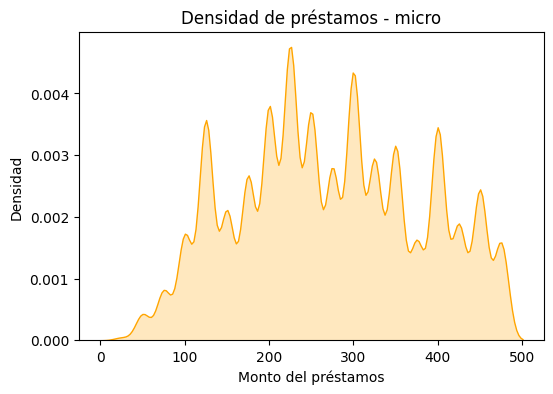

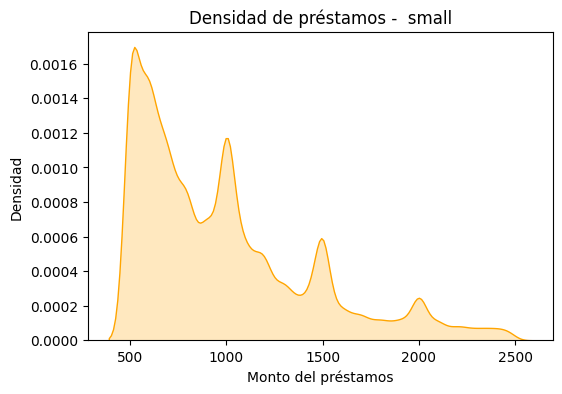

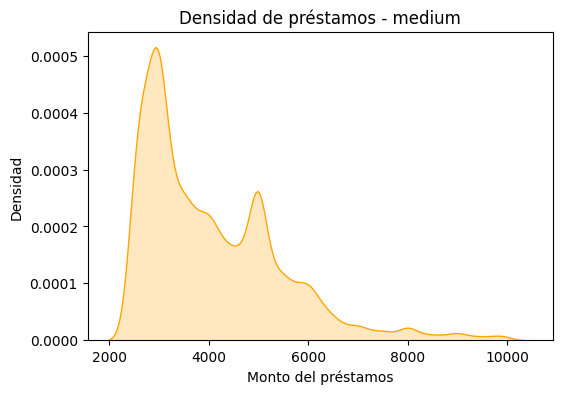

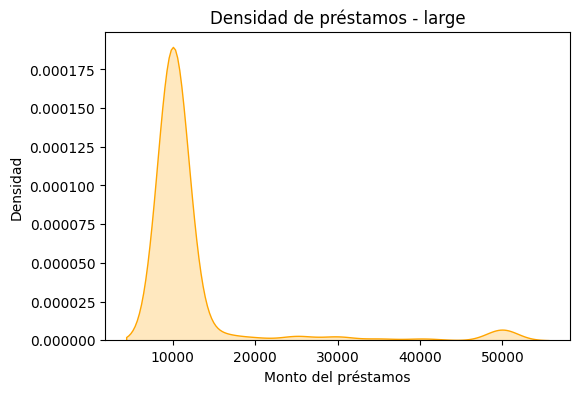

In [74]:

for cat in labels:
  subset = kiva_loans_df[kiva_loans_df["loan_amount_category"]== cat]
  plt.figure(figsize=(6,4))
  sns.kdeplot(subset['loan_amount'], fill=True, color='orange')
  plt.title(f"Densidad de préstamos - {cat}")
  plt.xlabel("Monto del préstamos")
  plt.ylabel("Densidad")
  plt.show()

In [75]:
#guardar el archivo nuevo
folder = "/content/drive/My Drive/datasets"
os.makedirs(folder, exist_ok=True)

kiva_loans_df.to_csv(f"{folder}/df_clean.csv", index=False) # convertir mi df en csv en mi drive
kiva_loans_df.to_csv('df_clean.csv') # convertir mi df en csv